In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('/Users/ameenabutt/Downloads/Parking_Violations_Issued_-_Fiscal_Year_2019.csv')
codes = pd.read_excel('/Users/ameenabutt/Downloads/ParkingViolationCodes_Nov_2018.xlsx')

df = df.sample(frac=0.01)
       

/Users/ameenabutt/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (17,18,20,22,23,29,30,31,32,36,38,39) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.isnull().sum()

Summons Number                            0
Plate ID                                  4
Registration State                        0
Plate Type                                0
Issue Date                                0
Violation Code                            0
Vehicle Body Type                       520
Vehicle Make                            695
Issuing Agency                            0
Street Code1                              0
Street Code2                              0
Street Code3                              0
Vehicle Expiration Date                   0
Violation Location                    18768
Violation Precinct                        0
Issuer Precinct                           0
Issuer Code                               0
Issuer Command                        18185
Issuer Squad                          18185
Violation Time                            2
Time First Observed                  108261
Violation County                        476
Violation In Front Of Or Opposit

In [4]:
clear_data = df.fillna(0) # Filling null values
clear_data.isnull().sum() # Checking if any null remains

Summons Number                       0
Plate ID                             0
Registration State                   0
Plate Type                           0
Issue Date                           0
Violation Code                       0
Vehicle Body Type                    0
Vehicle Make                         0
Issuing Agency                       0
Street Code1                         0
Street Code2                         0
Street Code3                         0
Vehicle Expiration Date              0
Violation Location                   0
Violation Precinct                   0
Issuer Precinct                      0
Issuer Code                          0
Issuer Command                       0
Issuer Squad                         0
Violation Time                       0
Time First Observed                  0
Violation County                     0
Violation In Front Of Or Opposite    0
House Number                         0
Street Name                          0
Intersecting Street      

In [5]:
clear_data.head(10) # reading data

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
11156410,8617634200,69891PC,NY,APP,06/07/2019,69,REFG,HIN,T,34490,...,WH,0.0,2019,0,0,06,0,0.0,0.0,0.0
2505614,8620496505,38086MH,NY,COM,09/10/2018,19,VAN,FORD,T,10510,...,WH,0.0,2015,0,0,04,0,0.0,0.0,0.0
5666044,8672103750,79784MD,NY,COM,12/18/2018,42,VAN,FORD,T,17770,...,WH,0.0,2013,144-3434,0,02,0,0.0,0.0,0.0
7030727,4653414452,GBJ1372,NY,PAS,02/12/2019,36,SUBN,VOLKS,V,0,...,BK,0.0,2014,0,0,0,PHTO SCHOOL ZN SPEED VIOLATION,0.0,0.0,0.0
10604078,8752150057,97019JE,NY,COM,05/02/2019,14,VAN,FRUEH,T,13610,...,BROWN,0.0,1996,0,0,038,0,0.0,0.0,0.0
9601087,8736009064,81255ML,NY,COM,04/25/2019,69,PICK,FORD,T,10410,...,BK,0.0,2018,0,0,01,0,0.0,0.0,0.0
10708383,4657662260,JCX9421,NY,PAS,06/18/2019,36,4DSD,BMW,V,0,...,BK,0.0,2015,0,0,0,PHTO SCHOOL ZN SPEED VIOLATION,0.0,0.0,0.0
9228445,5105843708,DXC1560,NY,PAS,03/24/2019,7,SUBN,TOYOT,V,0,...,GY,0.0,2003,0,0,0,FAILURE TO STOP AT RED LIGHT,0.0,0.0,0.0
3683061,8666469213,32725BB,NY,OMR,10/25/2018,14,BUS,FRUEH,T,34690,...,WH,0.0,2015,0,0,28,0,0.0,0.0,0.0
9355807,8663898095,EDF3475,NY,PAS,04/01/2019,16,SUBN,KIA,T,0,...,LTG,0.0,2009,0,0,01,0,0.0,0.0,0.0


In [6]:
clear_data.shape  # Total rows and columns

(114675, 43)

#Total Number for Violation by County

Violation County
NY    38105
K     23231
Q     21151
BX    14975
BK     7032
QN     5992
R      1515
ST     1305
MN      893
0       476
Name: Violation Code, dtype: int64

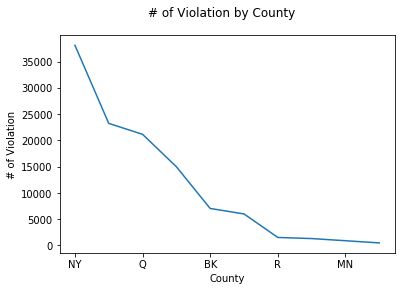

In [7]:
v_count = clear_data.groupby('Violation County')['Violation Code'].count().sort_values(ascending=False)
v_count.plot()
plt.suptitle('# of Violation by County')
plt.xlabel('County')
plt.ylabel('# of Violation')

v_count

#Sorting Violation only for County = Q

In [8]:
q_county = clear_data[['Violation County', 'Violation Code']] # Selecting only two columns
q_only = q_county[q_county['Violation County'] == 'Q']
q_only.sort_values(by='Violation Code', ascending=True).head(10)


,Violation County,Violation Code
10236544,Q,0
7485434,Q,0
10905373,Q,0
10389502,Q,0
9086039,Q,0
9138375,Q,6
10114226,Q,6
11022339,Q,6
3967272,Q,6
1948622,Q,6


In [9]:
column = ['Violation Code','Definition', 'Manhattan 96th St. & below', 'All Other Areas'] # setting column names
codes = pd.read_excel('//Users/ameenabutt/Downloads/ParkingViolationCodes_Nov_2018.xlsx', names=column, header=None )
code = codes.iloc[1:] # selecting column from 2nd row 
code.shape

(97, 4)

In [10]:
code

,Violation Code,Definition,Manhattan 96th St. & below,All Other Areas
1,1,FAILURE TO DISPLAY BUS PERMIT,515,515
2,2,NO OPERATOR NAM/ADD/PH DISPLAY,515,515
3,3,UNAUTHORIZED PASSENGER PICK-UP,515,515
4,4,BUS PARKING IN LOWER MANHATTAN,115,115
5,5,BUS LANE VIOLATION,115,115
...,...,...,...,...
93,93,REMOVE/REPLACE FLAT TIRE,65,65
94,96,RAILROAD CROSSING,95,95
95,97,VACANT LOT,65,45
96,98,OBSTRUCTING DRIVEWAY,95,95


In [11]:
merge = pd.merge(q_only, code, on='Violation Code')
merge.head(5)

,Violation County,Violation Code,Definition,Manhattan 96th St. & below,All Other Areas
0,Q,16,NO STANDING-EXC. TRUCK LOADING,95,95
1,Q,16,NO STANDING-EXC. TRUCK LOADING,95,95
2,Q,16,NO STANDING-EXC. TRUCK LOADING,95,95
3,Q,16,NO STANDING-EXC. TRUCK LOADING,95,95
4,Q,16,NO STANDING-EXC. TRUCK LOADING,95,95


In [12]:
merge.shape

(21146, 5)

In [13]:
merge[['Manhattan 96th St. & below', 'All Other Areas']].sum()

Manhattan 96th St. & below    1655560.0
All Other Areas               1389480.0
dtype: float64

#Merging Violation Fine with Clear data

In [14]:

new_merge = pd.merge(clear_data, code, on='Violation Code')
new_merge.head(3)

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation,Definition,Manhattan 96th St. & below,All Other Areas
0,8617634200,69891PC,NY,APP,06/07/2019,69,REFG,HIN,T,34490,...,0,0,06,0,0.0,0.0,0.0,FAIL TO DISP. MUNI METER RECPT,65,35
1,8736009064,81255ML,NY,COM,04/25/2019,69,PICK,FORD,T,10410,...,0,0,01,0,0.0,0.0,0.0,FAIL TO DISP. MUNI METER RECPT,65,35
2,8620043444,29719MB,NY,COM,04/10/2019,69,VAN,FORD,T,34430,...,0,0,06,0,0.0,0.0,0.0,FAIL TO DISP. MUNI METER RECPT,65,35


In [15]:
Selected_data = new_merge[['Violation Code', 
                          'Issuing Agency', 
                          'Issue Date',
                           'Violation County',
                           'All Other Areas']]

In [16]:
Selected_data['Fine amount of Violation'] = Selected_data['All Other Areas']
Selected_data['Revenue'] = Selected_data['All Other Areas']

/Users/ameenabutt/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/ameenabutt/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
Selected_data.head()

,Violation Code,Issuing Agency,Issue Date,Violation County,All Other Areas,Fine amount of Violation,Revenue
0,69,T,06/07/2019,NY,35,35,35
1,69,T,04/25/2019,NY,35,35,35
2,69,T,04/10/2019,NY,35,35,35
3,69,T,08/08/2018,NY,35,35,35
4,69,T,12/07/2018,NY,35,35,35


,,Fine amount of Violation
Violation Code,Violation County,
21,K,7882
14,NY,5818
36,BK,4612
21,Q,4220
20,NY,3968
38,Q,3699
36,QN,3639
21,NY,3326
46,NY,3243


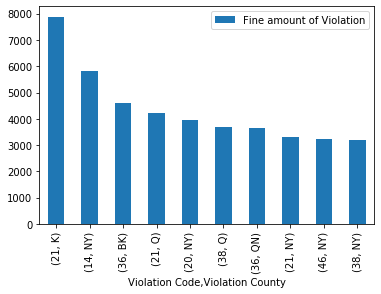

In [18]:
violation_group = Selected_data.groupby(['Violation Code', 'Violation County']).count().sort_values(by='Fine amount of Violation', ascending=False)
top10 = violation_group[['Fine amount of Violation']].head(10)
top10.plot.bar()
top10

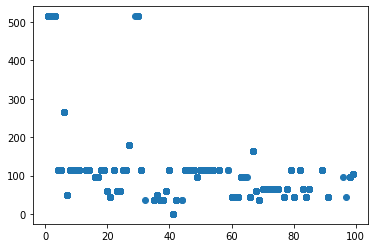

In [19]:
plt.scatter('Violation Code', 'Fine amount of Violation', data= Selected_data)

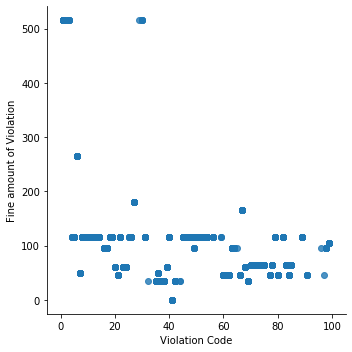

In [20]:
sns.lmplot('Violation Code', 'Fine amount of Violation', data= Selected_data, fit_reg=False)

#Revenue Generated in County by Violation Code

,,Revenue
Violation Code,Violation County,
14,NY,669070
46,NY,372945
21,K,354690
20,NY,238080
36,BK,230600
14,K,202170
40,K,199180
14,Q,191245
21,Q,189900


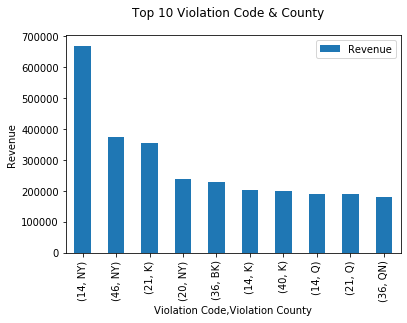

In [21]:
a_data = Selected_data.groupby(['Violation Code', 'Violation County']).aggregate({'Revenue': np.sum})
top10_data = a_data.sort_values(by='Revenue', ascending=False).head(10)
top10_data.plot.bar()
plt.suptitle('Top 10 Violation Code & County')
plt.ylabel('Revenue')
top10_data

#Top 10 Violation Code and Revenue generated

,Revenue
Violation Code,
14,1162765
21,821340
46,679420
40,641125
36,544300
20,472080
38,411285
19,365930
71,355290


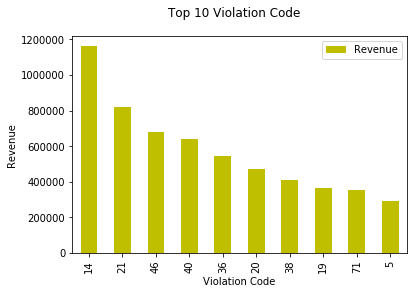

In [22]:
a_data = Selected_data.groupby(['Violation Code']).aggregate({'Revenue': np.sum})
top10_data = a_data.sort_values(by='Revenue', ascending=False).head(10)
top10_data.plot.bar(color='y')
plt.suptitle('Top 10 Violation Code')
plt.xlabel('Violation Code')
plt.ylabel('Revenue')
top10_data

#Total generate Revenue by County

,Revenue
Violation County,
NY,3092435
K,1556095
Q,1389480
BX,1062855
BK,403145
QN,335025
R,107820
MN,71040
ST,66810


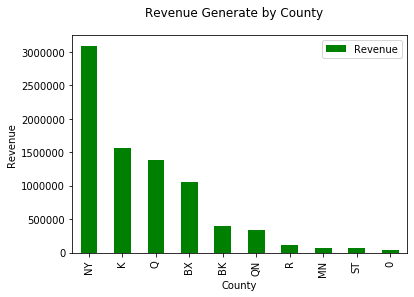

In [23]:
Revenue = Selected_data.groupby(['Violation County']).aggregate({'Revenue': np.sum})
Revenue_sorted = Revenue.sort_values(by='Revenue', ascending=False)
Revenue_sorted.plot.bar(color='g')
plt.suptitle('Revenue Generate by County')
plt.xlabel('County')
plt.ylabel('Revenue')
Revenue_sorted

Violation County
NY    3092435
K     1556095
Q     1389480
BX    1062855
BK     403145
QN     335025
R      107820
MN      71040
ST      66810
0       43920
Name: Revenue, dtype: int64

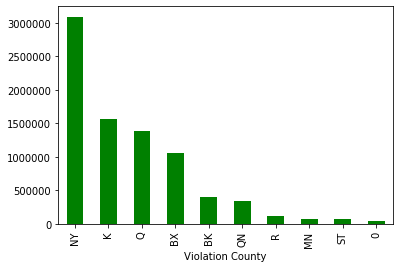

In [24]:

Rev = Revenue['Revenue'].sort_values(ascending=False)
#County = ['NY', 'K', 'Q', 'BX', 'BK', 'QN', 'R', 'MN', '0', 'ST']
#series = pd.Series(Rev, index=County, name='seriers')
#series.plot.bar(figsize=(6,6))
Rev.plot.bar(color='g')
#plt.suptitle('Revenue Generate by County')
Rev

Violation County
NY    3092435
K     1556095
Q     1389480
BX    1062855
BK     403145
QN     335025
R      107820
MN      71040
ST      66810
0       43920
Name: Revenue, dtype: int64

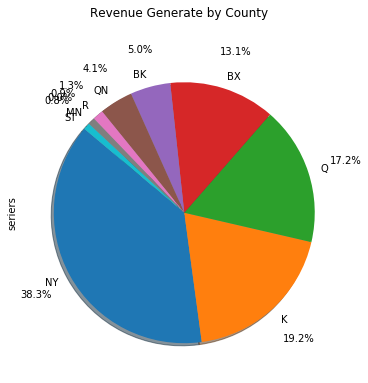

In [25]:

Rev = Revenue['Revenue'].sort_values(ascending=False)
County = ['NY', 'K', 'Q', 'BX', 'BK', 'QN', 'R', 'MN', '0', 'ST']
series = pd.Series(Rev, index=County, name='seriers')
series.plot.pie(figsize=(6,6),pctdistance=1.3, autopct='%1.1f%%', shadow=True, startangle=140)
plt.suptitle('Revenue Generate by County')
plt.savefig('filename.png')
Rev

In [26]:
Analysis = new_merge[['Violation County', 'Violation Code', 'All Other Areas']]

Analysis['All Other Areas'] = Selected_data['All Other Areas'].apply(pd.to_numeric)



/Users/ameenabutt/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
Analysis

,Violation County,Violation Code,All Other Areas
0,NY,69,35
1,NY,69,35
2,NY,69,35
3,NY,69,35
4,NY,69,35
...,...,...,...
114653,Q,30,515
114654,Q,65,95
114655,R,96,95
114656,NY,2,515


In [28]:
analysis = chart = Analysis.groupby('Violation County')['All Other Areas'].aggregate(['count', 'sum', 'mean']).sort_values(by='sum', ascending=False)
analysis

,count,sum,mean
Violation County,,,
NY,38099,3092435,81.168403
K,23230,1556095,66.986440
Q,21146,1389480,65.708881
BX,14973,1062855,70.984773
BK,7032,403145,57.330063
QN,5992,335025,55.912049
R,1515,107820,71.168317
MN,893,71040,79.552072
ST,1305,66810,51.195402
